# SALAMI

##Package imports

In [2]:
#If not installed, install Essentia, mirdata, JAMS, and update other needed libraries. 
# This cell is for running the notebook in Colab
import importlib.util
import pkg_resources

libraries = ['essentia', 'mirdata', 'jams']
versions = {'matplotlib': '3.6.3', 'librosa': '0.9.2'}

for library in libraries:
    if importlib.util.find_spec(library) is None:
        !pip install {library}

for library, version in versions.items():
    if pkg_resources.get_distribution(library).version != version:
        !pip install --upgrade {library}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Basic imports
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import json

# Imports to support MIR tasks
import mirdata
import jams
import jams.display
import essentia.standard as ess
import librosa
import librosa.display

#Import general signal processing modules
from scipy.fftpack import fft
from math import floor

#Import audio display 
import IPython.display as ipd

In [4]:
print(f'matplotlib version ---> {mpl.__version__}')
print(f'librosa version ---> {librosa.__version__}')

matplotlib version ---> 3.7.0
librosa version ---> 0.10.0


In [5]:
from google.colab import drive
drive.mount('/content/drive/')
#help(drive)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Let's check out mirdata's supported datasets

In [6]:
print(f'Is RWC_POPULAR available in supported datasets by mirdata? --> {"rwc_popular" in mirdata.list_datasets()}')

Is RWC_POPULAR available in supported datasets by mirdata? --> True


In [7]:
rwc_popular = mirdata.initialize("rwc_popular")

In [9]:
rwc_popular.data_home = '/content/drive/MyDrive/RWC/rwc pop'

In [10]:
print(f'Dataset name ---> {rwc_popular.name}')
print(f'Bibtex citation ---> {rwc_popular.bibtex}')

Dataset name ---> rwc_popular
Bibtex citation ---> @inproceedings{goto2002rwc,
  title={RWC Music Database: Popular, Classical and Jazz Music Databases.},
  author={Goto, Masataka and Hashiguchi, Hiroki and Nishimura, Takuichi and Oka, Ryuichi},
  booktitle={3rd International Society for Music Information Retrieval Conference},
  year={2002},
  series={ISMIR},
  note={Cite this if using audio, beat or section annotations},
}
@inproceedings{cho2011feature,
  title={A feature smoothing method for chord recognition using recurrence plots},
  author={Cho, Taemin and Bello, Juan P},
  booktitle={12th International Society for Music Information Retrieval Conference},
  year={2011},
  series={ISMIR},
  note={Cite this if using chord annotations},
}
@inproceedings{mauch2011timbre,
  title={Timbre and Melody Features for the Recognition of Vocal Activity and Instrumental Solos in Polyphonic Music.},
  author={Mauch, Matthias and Fujihara, Hiromasa and Yoshii, Kazuyoshi and Goto, Masataka},
  bo

In [11]:
validation = rwc_popular.validate()
print(f'Validation check up ---> {validation}')

  0%|          | 0/100 [00:08<?, ?it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-f5a9b25c23f6>", line 1, in <module>
    validation = rwc_popular.validate()
  File "/usr/local/lib/python3.8/dist-packages/mirdata/core.py", line 498, in validate
    missing_files, invalid_checksums = validate.validator(
  File "/usr/local/lib/python3.8/dist-packages/mirdata/validate.py", line 200, in validator
    missing_files, invalid_checksums = validate_index(dataset_index, data_home, verbose)
  File "/usr/local/lib/python3.8/dist-packages/mirdata/validate.py", line 165, in validate_index
    missing_tracks, invalid_tracks = validate_files(
  File "/usr/local/lib/python3.8/dist-packages/mirdata/validate.py", line 94, in validate_files
    exists, valid = validate(local_path, checksum)
  File "/usr/local/lib/python3.8/dist-packages/mirdata/validate.py", line 54, in

KeyboardInterrupt: ignored

In [12]:
rwc_popular_ids = rwc_popular.track_ids  # Return track IDs
rwc_popular_data = rwc_popular.load_tracks()  # Load Load all tracks in RWC POPULAR

print(type(rwc_popular_data[rwc_popular_ids[0]])) # Print class
example_track = rwc_popular_data[rwc_popular_ids[0]]  # Visualize a single track
print(example_track)

<class 'mirdata.datasets.rwc_popular.Track'>
Track(
  audio_path="/content/drive/MyDrive/RWC/rwc pop/audio/rwc-p-m01/1.wav",
  beats_path="/content/drive/MyDrive/RWC/rwc pop/annotations/AIST.RWC-MDB-P-2001.BEAT/RM-P001.BEAT.TXT",
  chords_path="...tent/drive/MyDrive/RWC/rwc pop/annotations/AIST.RWC-MDB-P-2001.CHORD/RWC_Pop_Chords/N001-M01-T01.lab",
  sections_path="/content/drive/MyDrive/RWC/rwc pop/annotations/AIST.RWC-MDB-P-2001.CHORUS/RM-P001.CHORUS.TXT",
  track_id="RM-P001",
  voca_inst_path="/content/drive/MyDrive/RWC/rwc pop/annotations/AIST.RWC-MDB-P-2001.VOCA_INST/RM-P001.VOCA_INST.TXT",
  artist: ,
  audio: The track's audio

        Returns,
  beats: ,
  chords: ,
  drum_information: ,
  duration: ,
  instruments: ,
  piece_number: ,
  sections: ,
  singer_information: ,
  suffix: ,
  tempo: ,
  title: ,
  track_number: ,
  vocal_instrument_activity: ,
)


In [13]:
example_track_audio_path = rwc_popular_data[rwc_popular_ids[0]].audio_path #track's audio
print(f'Path to example track ---> {example_track_audio_path}')

Path to example track ---> /content/drive/MyDrive/RWC/rwc pop/audio/rwc-p-m01/1.wav


In [14]:
example_track_audio = rwc_popular_data[rwc_popular_ids[0]].audio #track's audio
print(f'The actual audio data (array and the sampling rate) of our example track ---> {example_track_audio}')

The actual audio data (array and the sampling rate) of our example track ---> (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)


In [23]:
example_track.chords_path

AttributeError: ignored

In [22]:
#sound reading and displaying
x, fs = example_track_audio
ipd.display(ipd.Audio(data=x, rate=fs))

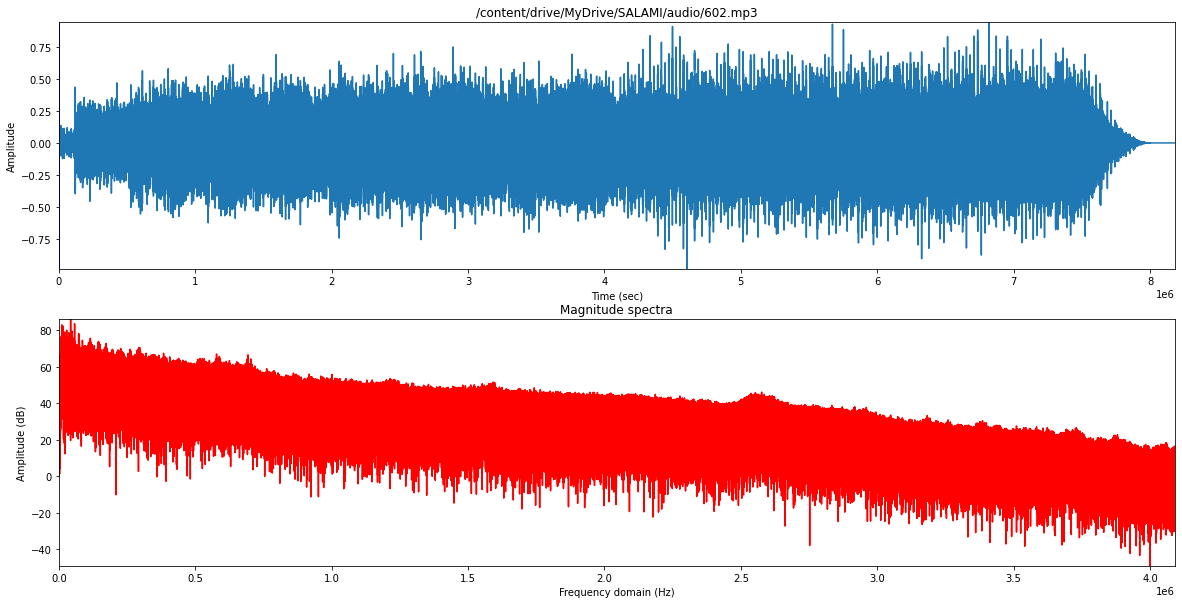

In [ ]:
#Array preprocessing
# X, fft computation
X = fft(x) 
#fft size
N = X.size
#Array length
M = len(x)

#Setting figure size
plt.figure(figsize=(20, 10))

#Plotting input sound (x-axis in sec)
plt.subplot(2,1,1)
plt.plot(np.arange(N)/float(fs), x, 'b')
plt.plot(x, label = 'sound waveform')
plt.axis([0, N/float(fs), min(x), max(x)])
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.title(str(example_track.audio_path))
plt.autoscale(tight=True)

#Plotting magnitude spectra (x-axis in Hz)
plt.subplot(2,1,2)
plt.plot(np.real(20*np.log10(np.abs(X[:int(M/2)+1]))),'r', lw=1.5)
plt.xlabel('Frequency domain (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Magnitude spectra')
plt.autoscale(tight=True)

plt.show()

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


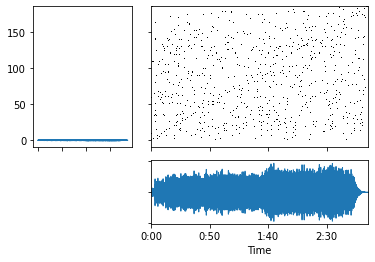

In [ ]:
y, sr = librosa.load(example_track_audio_path)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
sim = librosa.segment.recurrence_matrix(chroma)

fig, ax = plt.subplot_mosaic(
    """
    hSS
    hSS
    .vv
    """)

librosa.display.specshow(sim, ax=ax['S'], x_axis='time', y_axis='time', auto_aspect=False)
ax['S'].label_outer()
ax['S'].sharex(ax['v'])
ax['S'].sharey(ax['h'])

librosa.display.waveshow(y, ax=ax['v'])
ax['v'].label_outer()

#librosa.display.waveshow(y=np.transpose(y), ax=ax['h'])
#ax['h'].label_outer()

plt.autoscale(tight=False)
plt.show()

#lib_dpl.waveshow(y, ax=ax['h'], transpose=True)
#ax['h'].label_outer()

The SALAMI dataset provides two levels of reference structural annotations for each track: an upper-level segmentation, where the structural patterns corresponds to sections, and a lower-level segmentation that can reach the phrase level.

In [ ]:
example_ann_lw1 = example_track.sections_annotator1_lowercase_path
example_ann_up1 = example_track.sections_annotator1_uppercase_path
example_ann_lw2 = example_track.sections_annotator2_lowercase_path
example_ann_up2 = example_track.sections_annotator2_uppercase_path

print(f'Path to sections_annotator1_lowercase_path for sample track --> {example_ann_lw1}')
print(f'Path to sections_annotator1_uppercase_path for sample track --> {example_ann_up1}')
print(f'Path to sections_annotator1_lowercase_path for sample track --> {example_ann_lw2}')
print(f'Path to sections_annotator1_uppercase_path for sample track --> {example_ann_up2}')

Path to sections_annotator1_lowercase_path for sample track --> /content/drive/MyDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile1_lowercase.txt
Path to sections_annotator1_uppercase_path for sample track --> /content/drive/MyDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile1_uppercase.txt
Path to sections_annotator1_lowercase_path for sample track --> /content/drive/MyDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile2_lowercase.txt
Path to sections_annotator1_uppercase_path for sample track --> /content/drive/MyDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile2_uppercase.txt


In [ ]:
with open(example_ann_lw1) as f:
    contents_lw1 = f.readlines()

with open(example_ann_up1) as f:
    contents_up1 = f.readlines()

with open(example_ann_lw2) as f:
    contents_lw2 = f.readlines()

with open(example_ann_up2) as f:
    contents_up2 = f.readlines()
    
print(f'Actual content for "Annotator 1 lowercase for sample track" --> {contents_lw1}')
print(f'Actual content for "Annotator 1 uppercase for sample track "--> {contents_up1}')   
print(f'Actual content for "Annotator 2 lowercase for sample track" --> {contents_lw2}')
print(f'Actual content for "Annotator 2 lowercase for sample track" --> {contents_up2}')

Actual content for "Annotator 1 lowercase for sample track" --> ['0.0\tSilence\n', '0.255419501\tn\n', '2.712108843\ta\n', '7.474149659\tb\n', '12.213696145\ta\n', '17.253537414\tb\n', '22.0530839\ta\n', '26.902108843\tc\n', '31.838117913\ta\n', '36.750090702\tb\n', '41.552108843\ta\n', '46.623378684\tc\n', '51.554240362\td\n', '56.5661678\td\n', '61.525895691\te\n', '66.468843537\tf\n', '71.446122448\ta\n', '76.326054421\tb\n', '81.278163265\ta\n', '86.238095238\tc\n', '91.190249433\ta\n', '96.136507936\tb\n', '101.038231292\ta\n', '105.962743764\tc\n', '111.030181405\td\n', '115.902267573\td\n', '120.822108843\te\n', '125.847777777\tf\n', '130.742789115\td\n', '135.694081632\td\n', '140.670136054\te\n', '145.63079365\tf\n', '150.564535147\td\n', '155.526190476\td\n', '160.461927437\te\n', '165.46217687\tf\n', '170.286598639\td\n', '181.671882086\tSilence\n', '185.502743764\tEnd']
Actual content for "Annotator 1 uppercase for sample track "--> ['0.0\tSilence\n', '0.255419501\tN\n', '2

In [ ]:
example_track.to_jams()

<JAMS(file_metadata=<FileMetadata(...)>,
      annotations=[2 annotations],
      sandbox=<Sandbox(...)>)>

In [ ]:
sorted_key_list = example_track.to_jams().annotations[1].data
print(type(sorted_key_list))
print(sorted_key_list)

<class 'sortedcontainers.sortedlist.SortedKeyList'>
SortedKeyList([Observation(time=0.0, duration=12.339342403, value={'label': 'I', 'level': 0}, confidence=None), Observation(time=0.0, duration=2.706621315, value={'label': 'i', 'level': 1}, confidence=None), Observation(time=2.706621315, duration=4.812086167, value={'label': 'a', 'level': 1}, confidence=None), Observation(time=7.518707482, duration=4.820634921, value={'label': 'c', 'level': 1}, confidence=None), Observation(time=12.339342403, duration=19.47170068, value={'label': 'A', 'level': 0}, confidence=None), Observation(time=12.339342403, duration=4.935850340000002, value={'label': 'a', 'level': 1}, confidence=None), Observation(time=17.275192743, duration=4.785034013999997, value={'label': 'b', 'level': 1}, confidence=None), Observation(time=22.060226757, duration=4.910430839, value={'label': 'a', 'level': 1}, confidence=None), Observation(time=26.970657596, duration=4.8403854870000025, value={'label': 'c', 'level': 1}, confid

In [ ]:
df = pd.DataFrame(sorted_key_list)
df

,time,duration,value,confidence
0,0.000000,12.339342,"{'label': 'I', 'level': 0}",None
1,0.000000,2.706621,"{'label': 'i', 'level': 1}",None
2,2.706621,4.812086,"{'label': 'a', 'level': 1}",None
3,7.518707,4.820635,"{'label': 'c', 'level': 1}",None
4,12.339342,19.471701,"{'label': 'A', 'level': 0}",None
5,12.339342,4.935850,"{'label': 'a', 'level': 1}",None
6,17.275193,4.785034,"{'label': 'b', 'level': 1}",None
7,22.060227,4.910431,"{'label': 'a', 'level': 1}",None
8,26.970658,4.840385,"{'label': 'c', 'level': 1}",None
9,31.811043,19.791655,"{'label': 'A', 'level': 0}",None


##Metadata descriptions

`metadata.csv`

This is the main metadata file and describes all the pieces in the collection.

The fields are:

	SONG_ID                   Unique identifier for piece of music
	SOURCE                    Either Codaich, IA (Internet Archive), or RWC
	ANNOTATOR1                ID number for first annotator
	ANNOTATOR2                ID number for second annotator
	SONG_DURATION             Duration of the piece, in seconds
	SONG_TITLE                Title
	ARTIST                    Artist
	ANNOTATION_TIME1          Self-reported time to complete annotation for first annotator
	ANNOTATION_TIME2          Self-reported time to complete annotation for second annotator
	TEXTFILE1                 File path for first annotator's file
	TEXTFILE2                 File path for second annotator's file
	CLASS                     Broad genre (classical, jazz, popular, world, Live_Music_Archive, or unknown)
	GENRE                     Narrow genre
	SUBMISSION_DATE1          Date of submission of first annotation
	SUBMISSION_DATE2          Date of submission of second annotation
	XEQS1                     Was the first annotation converted automatically from X/= notation? X indicates yes; 0 indicates no.
	XEQS2                     Was the second annotation converted automatically from X/= notation? X indicates yes; 0 indicates no.

In [ ]:
metadata_csv = '/content/drive/MyDrive/SALAMI/salami-data-public-hierarchy-corrections/metadata/metadata.csv'
df = pd.read_csv(metadata_csv)

In [ ]:
df.head()

,SONG_ID,SOURCE,ANNOTATOR1,ANNOTATOR2,FILE_LOCATION,SONG_DURATION,EMPTY,SONG_TITLE,ARTIST,FORMAT,...,TEXTFILE1,TEXTFILE2,CLASS,GENRE,SUBMISSION_DATE1,SUBMISSION_DATE2,SONG_WAS_PRIVATE_FLAG,SONG_WAS_DISCARDED_FLAG,XEQS1,XEQS2
0,2,Codaich,5,8,/srv/salami/data/Codaich/popular/The_Smashing_...,264.0,NaN,For_God_And_Country,The_Smashing_Pumpkins,mp3,...,/srv/salami/data/Codaich/popular/The_Smashing_...,/srv/salami/data/Codaich/popular/The_Smashing_...,popular,Alternative_Pop___Rock,2010-06-14,2010-06-04,0,False,X,X
1,4,Codaich,3,7,/srv/salami/data/Codaich/popular/Shivaree/I_cl...,236.0,NaN,I_close_my_eyes,Shivaree,mp3,...,/srv/salami/data/Codaich/popular/Shivaree/I_cl...,/srv/salami/data/Codaich/popular/Shivaree/I_cl...,popular,Alternative_Pop___Rock,2010-06-02,2010-06-07,0,False,X,X
2,6,Codaich,5,7,/srv/salami/data/Codaich/popular/Ladyhawk/My_O...,170.0,NaN,My_Old_Jacknife,Ladyhawk,mp3,...,/srv/salami/data/Codaich/popular/Ladyhawk/My_O...,/srv/salami/data/Codaich/popular/Ladyhawk/My_O...,popular,Alternative_Pop___Rock,2010-07-01,2010-06-08,0,False,0,X
3,8,Codaich,3,4,/srv/salami/data/Codaich/popular/Jewel/Love_Me...,227.0,NaN,Love_Me___Just_Leave_Me_Alone,Jewel,mp3,...,/srv/salami/data/Codaich/popular/Jewel/Love_Me...,/srv/salami/data/Codaich/popular/Jewel/Love_Me...,popular,Alternative_Pop___Rock,2010-06-02,2010-07-19,0,False,X,0
4,10,Codaich,4,5,/srv/salami/data/Codaich/popular/The_Cure/How_...,314.0,NaN,How_Beautiful_You_Are,The_Cure,mp3,...,/srv/salami/data/Codaich/popular/The_Cure/How_...,/srv/salami/data/Codaich/popular/The_Cure/How_...,popular,Alternative_Pop___Rock,2010-07-10,2010-07-01,0,False,0,0


In [ ]:
df.describe()

,SONG_ID,ANNOTATOR1,ANNOTATOR2,SONG_DURATION,EMPTY,ANNOTATION_TIME1,ANNOTATION_TIME2,SONG_WAS_PRIVATE_FLAG
count,1446.000000,1446.000000,1446.000000,1310.000000,0.0,1423.000000,980.000000,1446.000000
mean,828.343707,7.661134,9.081604,278.848855,NaN,19.695713,19.088776,0.428077
std,477.477356,5.232316,3.584701,171.589482,NaN,43.921241,10.130773,0.494971
min,2.000000,2.000000,3.000000,4.000000,NaN,0.000000,0.000000,0.000000
25%,415.250000,4.000000,6.000000,176.000000,NaN,15.000000,15.000000,0.000000
50%,828.500000,6.000000,8.000000,246.000000,NaN,15.000000,15.000000,0.000000
75%,1241.500000,16.000000,14.000000,348.000000,NaN,20.000000,25.000000,1.000000
max,1655.000000,16.000000,14.000000,1746.000000,NaN,1629.000000,140.000000,1.000000


In [ ]:
for index, track in enumerate(salami_data):
  print(f'Iteration --> {index}', 
        f'Track data --> {salami_data[salami_ids[int(index)]]}', 
        f'JAMS annotaion --> {salami_data[salami_ids[int(index)]].to_jams()}')

Iteration --> 0 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/602.mp3",
  sections_annotator1_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/602/parsed/textfile2_uppercase.txt",
  track_id="602",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_annota

Iteration --> 3 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/787.mp3",
  sections_annotator1_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/787/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/787/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/787/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/787/parsed/textfile2_uppercase.txt",
  track_id="787",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_annota

Iteration --> 6 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/491.mp3",
  sections_annotator1_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/491/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/491/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/491/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/491/parsed/textfile2_uppercase.txt",
  track_id="491",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_annota

Iteration --> 9 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/982.mp3",
  sections_annotator1_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/982/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/982/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/982/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/982/parsed/textfile2_uppercase.txt",
  track_id="982",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_annota

Iteration --> 12 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/1491.mp3",
  sections_annotator1_lowercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1491/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1491/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1491/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1491/parsed/textfile2_uppercase.txt",
  track_id="1491",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_ann

Iteration --> 15 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/22.mp3",
  sections_annotator1_lowercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/22/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/22/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/22/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/22/parsed/textfile2_uppercase.txt",
  track_id="22",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_annotat

Iteration --> 18 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/1232.mp3",
  sections_annotator1_lowercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1232/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1232/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1232/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...rive/SALAMI/salami-data-public-hierarchy-corrections/annotations/1232/parsed/textfile2_uppercase.txt",
  track_id="1232",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_ann

Iteration --> 21 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/12.mp3",
  sections_annotator1_lowercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/12/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/12/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/12/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...yDrive/SALAMI/salami-data-public-hierarchy-corrections/annotations/12/parsed/textfile2_uppercase.txt",
  track_id="12",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_annotat

Iteration --> 24 Track data --> Track(
  audio_path="/content/drive/MyDrive/SALAMI/audio/960.mp3",
  sections_annotator1_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/960/parsed/textfile1_lowercase.txt",
  sections_annotator1_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/960/parsed/textfile1_uppercase.txt",
  sections_annotator2_lowercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/960/parsed/textfile2_lowercase.txt",
  sections_annotator2_uppercase_path="...Drive/SALAMI/salami-data-public-hierarchy-corrections/annotations/960/parsed/textfile2_uppercase.txt",
  track_id="960",
  annotator_1_id: ,
  annotator_1_time: ,
  annotator_2_id: ,
  annotator_2_time: ,
  artist: ,
  audio: The track's audio

        Returns,
  broad_genre: ,
  duration: ,
  genre: ,
  sections_annotator_1_lowercase: ,
  sections_annotator_1_uppercase: ,
  sections_annotator_2_lowercase: ,
  sections_annot

ValueError: ignored